In [37]:
import math
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [38]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours_s = pd.read_csv("../../exports/appa2_shrinked.csv")
appa_hours_s = appa_hours_s.drop('Unnamed: 0', axis=1)
appa_hours_s.Time = pd.to_datetime(appa_hours_s.Time)

In [39]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa2.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [40]:
# appa_hours = appa_hours[
#     (appa_hours.Time > "2021-07-02")
#     & (appa_hours.Time < "2021-11-14")
# ]

In [41]:
# appa_hours.to_csv("../../exports/appa2_shrinked.csv")

In [42]:
appa_hours.columns

Index(['Time', 'LaFeO3_1', 'LaFeO3_2', 'STN_1', 'STN_2', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'STN_1_heatR', 'STN_2_heatR', 'LaFeO3_1_heatV',
       'LaFeO3_2_heatV', 'STN_1_heatV', 'STN_2_heatV', 'Temperature',
       'Relative_Humidity', 'Pressure', 'VOC', 'LaFeO3_1_Age', 'LaFeO3_2_Age',
       'STN_1_Age', 'STN_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday',
       'cos_weekday', 'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate',
       'year', 'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10',
       'CO', 'NO2'],
      dtype='object')

<AxesSubplot:xlabel='Time'>

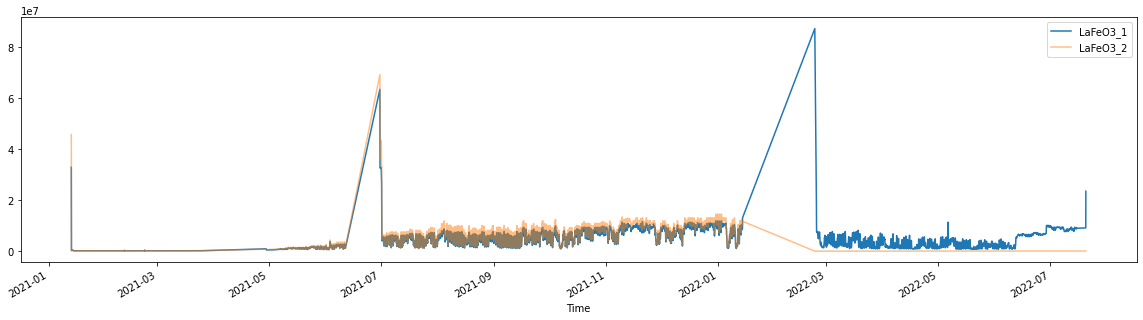

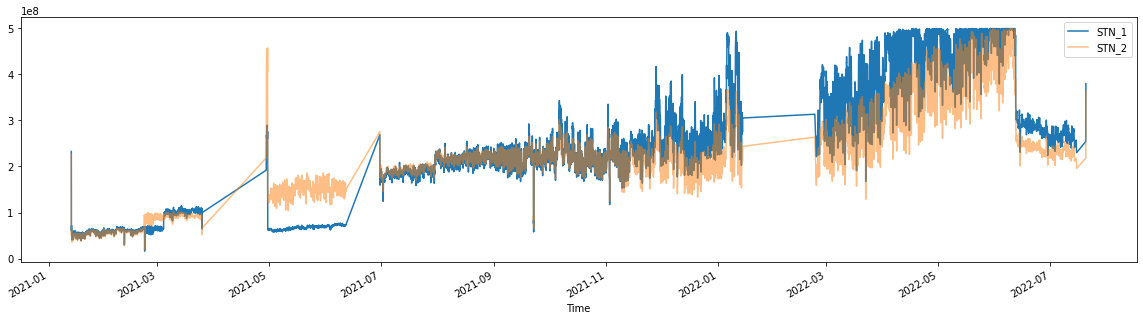

In [43]:
ax = appa_hours.plot("Time", "LaFeO3_1", figsize=(20,5))
appa_hours.plot("Time", "LaFeO3_2", figsize=(20,5), ax=ax, alpha = 0.5)
ax1 = appa_hours.plot("Time", "STN_1", figsize=(20,5))
appa_hours.plot("Time", "STN_2", figsize=(20,5), ax = ax1, alpha = 0.5)

<AxesSubplot:xlabel='Time'>

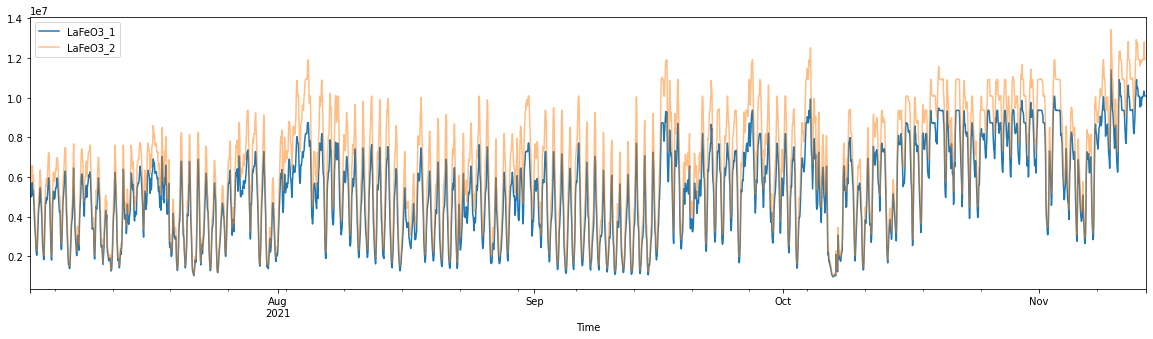

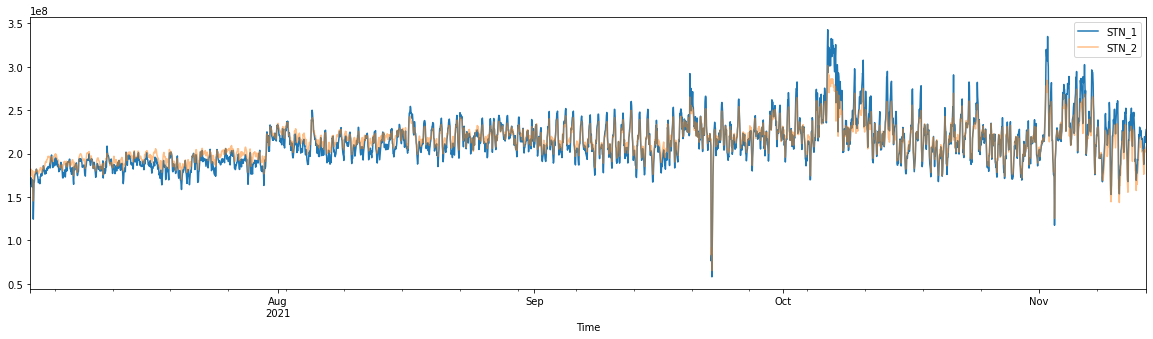

In [44]:
ax = appa_hours_s.plot("Time", "LaFeO3_1", figsize=(20,5))
appa_hours_s.plot("Time", "LaFeO3_2", figsize=(20,5), ax=ax, alpha = 0.5)
ax1 = appa_hours_s.plot("Time", "STN_1", figsize=(20,5))
appa_hours_s.plot("Time", "STN_2", figsize=(20,5), ax = ax1, alpha = 0.5)

In [54]:
appa_hours_s.columns

Index(['Time', 'LaFeO3_1', 'LaFeO3_2', 'STN_1', 'STN_2', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'STN_1_heatR', 'STN_2_heatR', 'LaFeO3_1_heatV',
       'LaFeO3_2_heatV', 'STN_1_heatV', 'STN_2_heatV', 'Temperature',
       'Relative_Humidity', 'Pressure', 'VOC', 'LaFeO3_1_Age', 'LaFeO3_2_Age',
       'STN_1_Age', 'STN_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday',
       'cos_weekday', 'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate',
       'year', 'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10',
       'CO', 'NO2'],
      dtype='object')

In [57]:
fig = px.line(x=appa_hours_s.Time, y = appa_hours_s.LaFeO3_1)
fig.add_scatter(x=appa_hours_s.Time, y = appa_hours_s.LaFeO3_2, mode = "lines", opacity= 0.5)
fig.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_8964\182968655.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



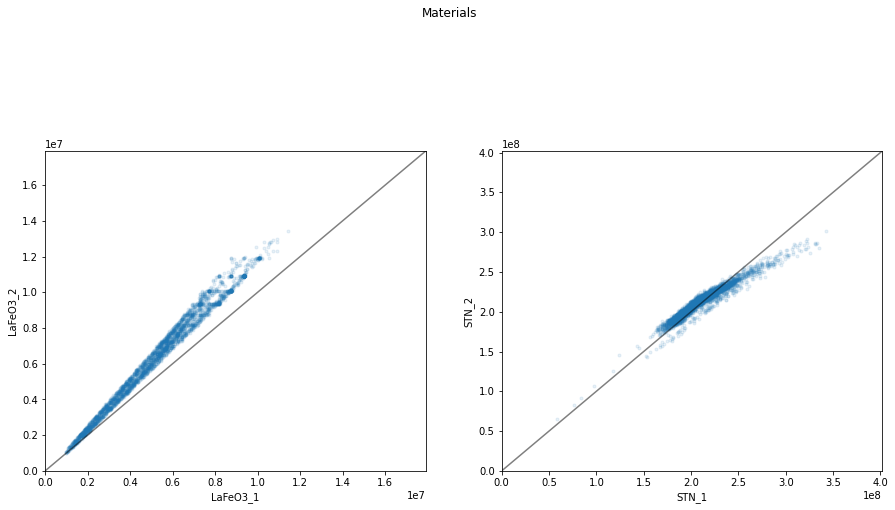

In [46]:
materials = [('LaFeO3_1', 'LaFeO3_2'), ('STN_1', 'STN_2')]
fig = plt.figure(figsize=(15, 20)) 
fig.suptitle('Materials') 
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2) 
for index, material in enumerate(materials):     
    ax = plt.Subplot(fig, outer[index])     
    ax.scatter(appa_hours_s[material[0]], appa_hours_s[material[1]], marker=".", alpha=0.1)     
    ax.set_xlabel(material[0])     
    ax.set_ylabel(material[1])     
    ax.set_xlim(0, appa_hours_s[material[1]].max() * 4/3)     
    ax.set_ylim(0, appa_hours_s[material[1]].max() * 4/3)    
    ax.plot([-100, appa_hours_s[material[1]].max()*10], [-100, appa_hours_s[material[1]].max()*10], c="k", alpha=0.5)
    fig.add_subplot(ax) 

fig.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_8964\1654628472.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



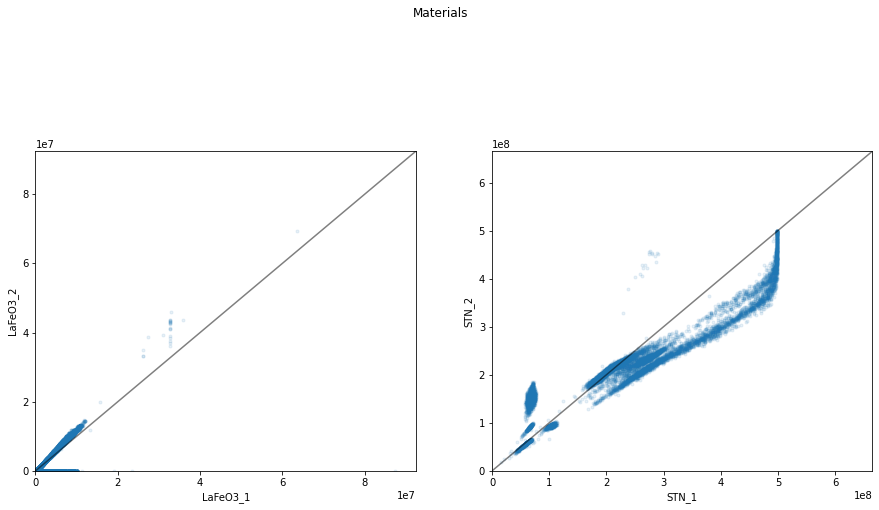

In [47]:
materials = [('LaFeO3_1', 'LaFeO3_2'), ('STN_1', 'STN_2')]
fig = plt.figure(figsize=(15, 20)) 
fig.suptitle('Materials') 
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2) 
for index, material in enumerate(materials):     
    ax = plt.Subplot(fig, outer[index])     
    ax.scatter(appa_hours[material[0]], appa_hours[material[1]], marker=".", alpha=0.1)     
    ax.set_xlabel(material[0])     
    ax.set_ylabel(material[1])     
    ax.set_xlim(0, appa_hours[material[1]].max() * 4/3)     
    ax.set_ylim(0, appa_hours[material[1]].max() * 4/3)    
    ax.plot([-100, appa_hours[material[1]].max()*10], [-100, appa_hours[material[1]].max()*10], c="k", alpha=0.5)
    fig.add_subplot(ax) 

fig.show()